
### CAN'T SEE THE FOREST, FOR ALL THE TREES

**Laboration**

Syftet med den här laborationen är att lära oss hur vi på ett korrekt sätt kan tune:a hyperparameters samt träna och jämföra prestanda mellan många olika modeller - för ett verklighetstroget problem.

Vi kommer framförallt jobba med trädbaserade modeller - Decision Tree och Random Forest.

Datasetet som vi kommer jobba med och information om denne hittar ni [här](https://archive.ics.uci.edu/dataset/320/student+performance). Ni ska jobba med filen som heter 'student-por.csv'.

**Instruktioner**

Utför varje uppgift så att jag kan köra er notebook rakt-av, uppifrån och ner! Varje uppgift ska lösas på angiven plats.

**Inlämning**

Skicka in hela din notebook på ITHS-portalen, efter att du döpt om den till *laboration_forest_förnamn_efternamn.ipynb*.

**Uppgift 0**

In [20]:
# importera samtliga nödvändiga paket här.
# efterhand kanske du inser att du behöver importera fler paket, lägg då över importerna hit istället
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ydata_profiling import ProfileReport
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

**Uppgift 1**

Läs på om datasetet. Ladda därefter ner den och läs in den till en pandas dataframe. 

Obs: du bör troligtvis behöva *delimiter=';'* som argument till pd.read_csv funktionen.

In [21]:
# lös uppgift 1 här
student_df = pd.read_csv("../data/student-por.csv", delimiter=";")
student_df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


**Uppgift 2**

Utför en ordentlig EDA (Exploratory Data Analysis). Rita upp relevanta plottar och kommentera på det du känner är befogat.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


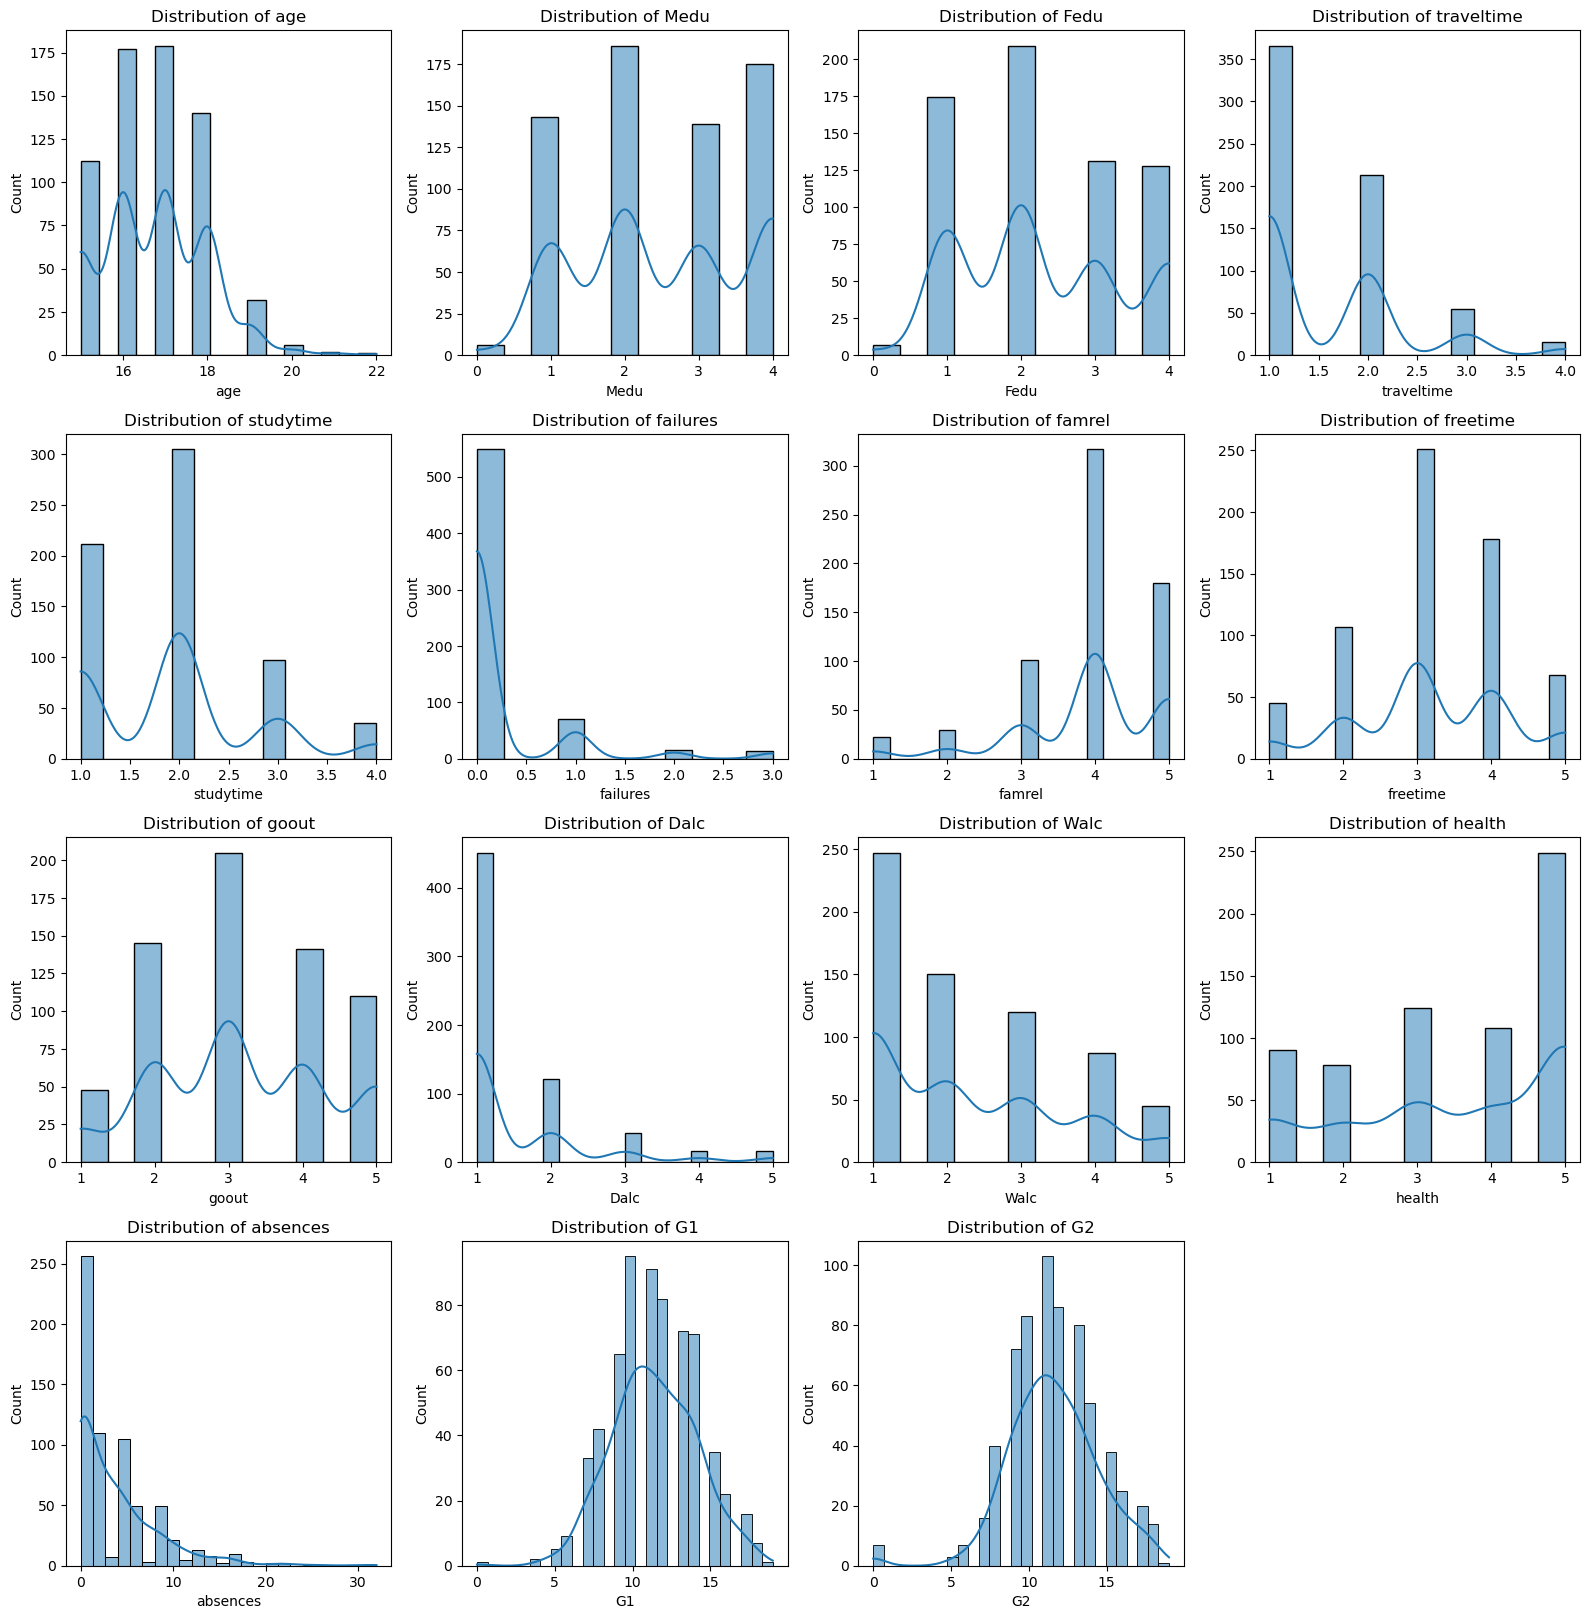

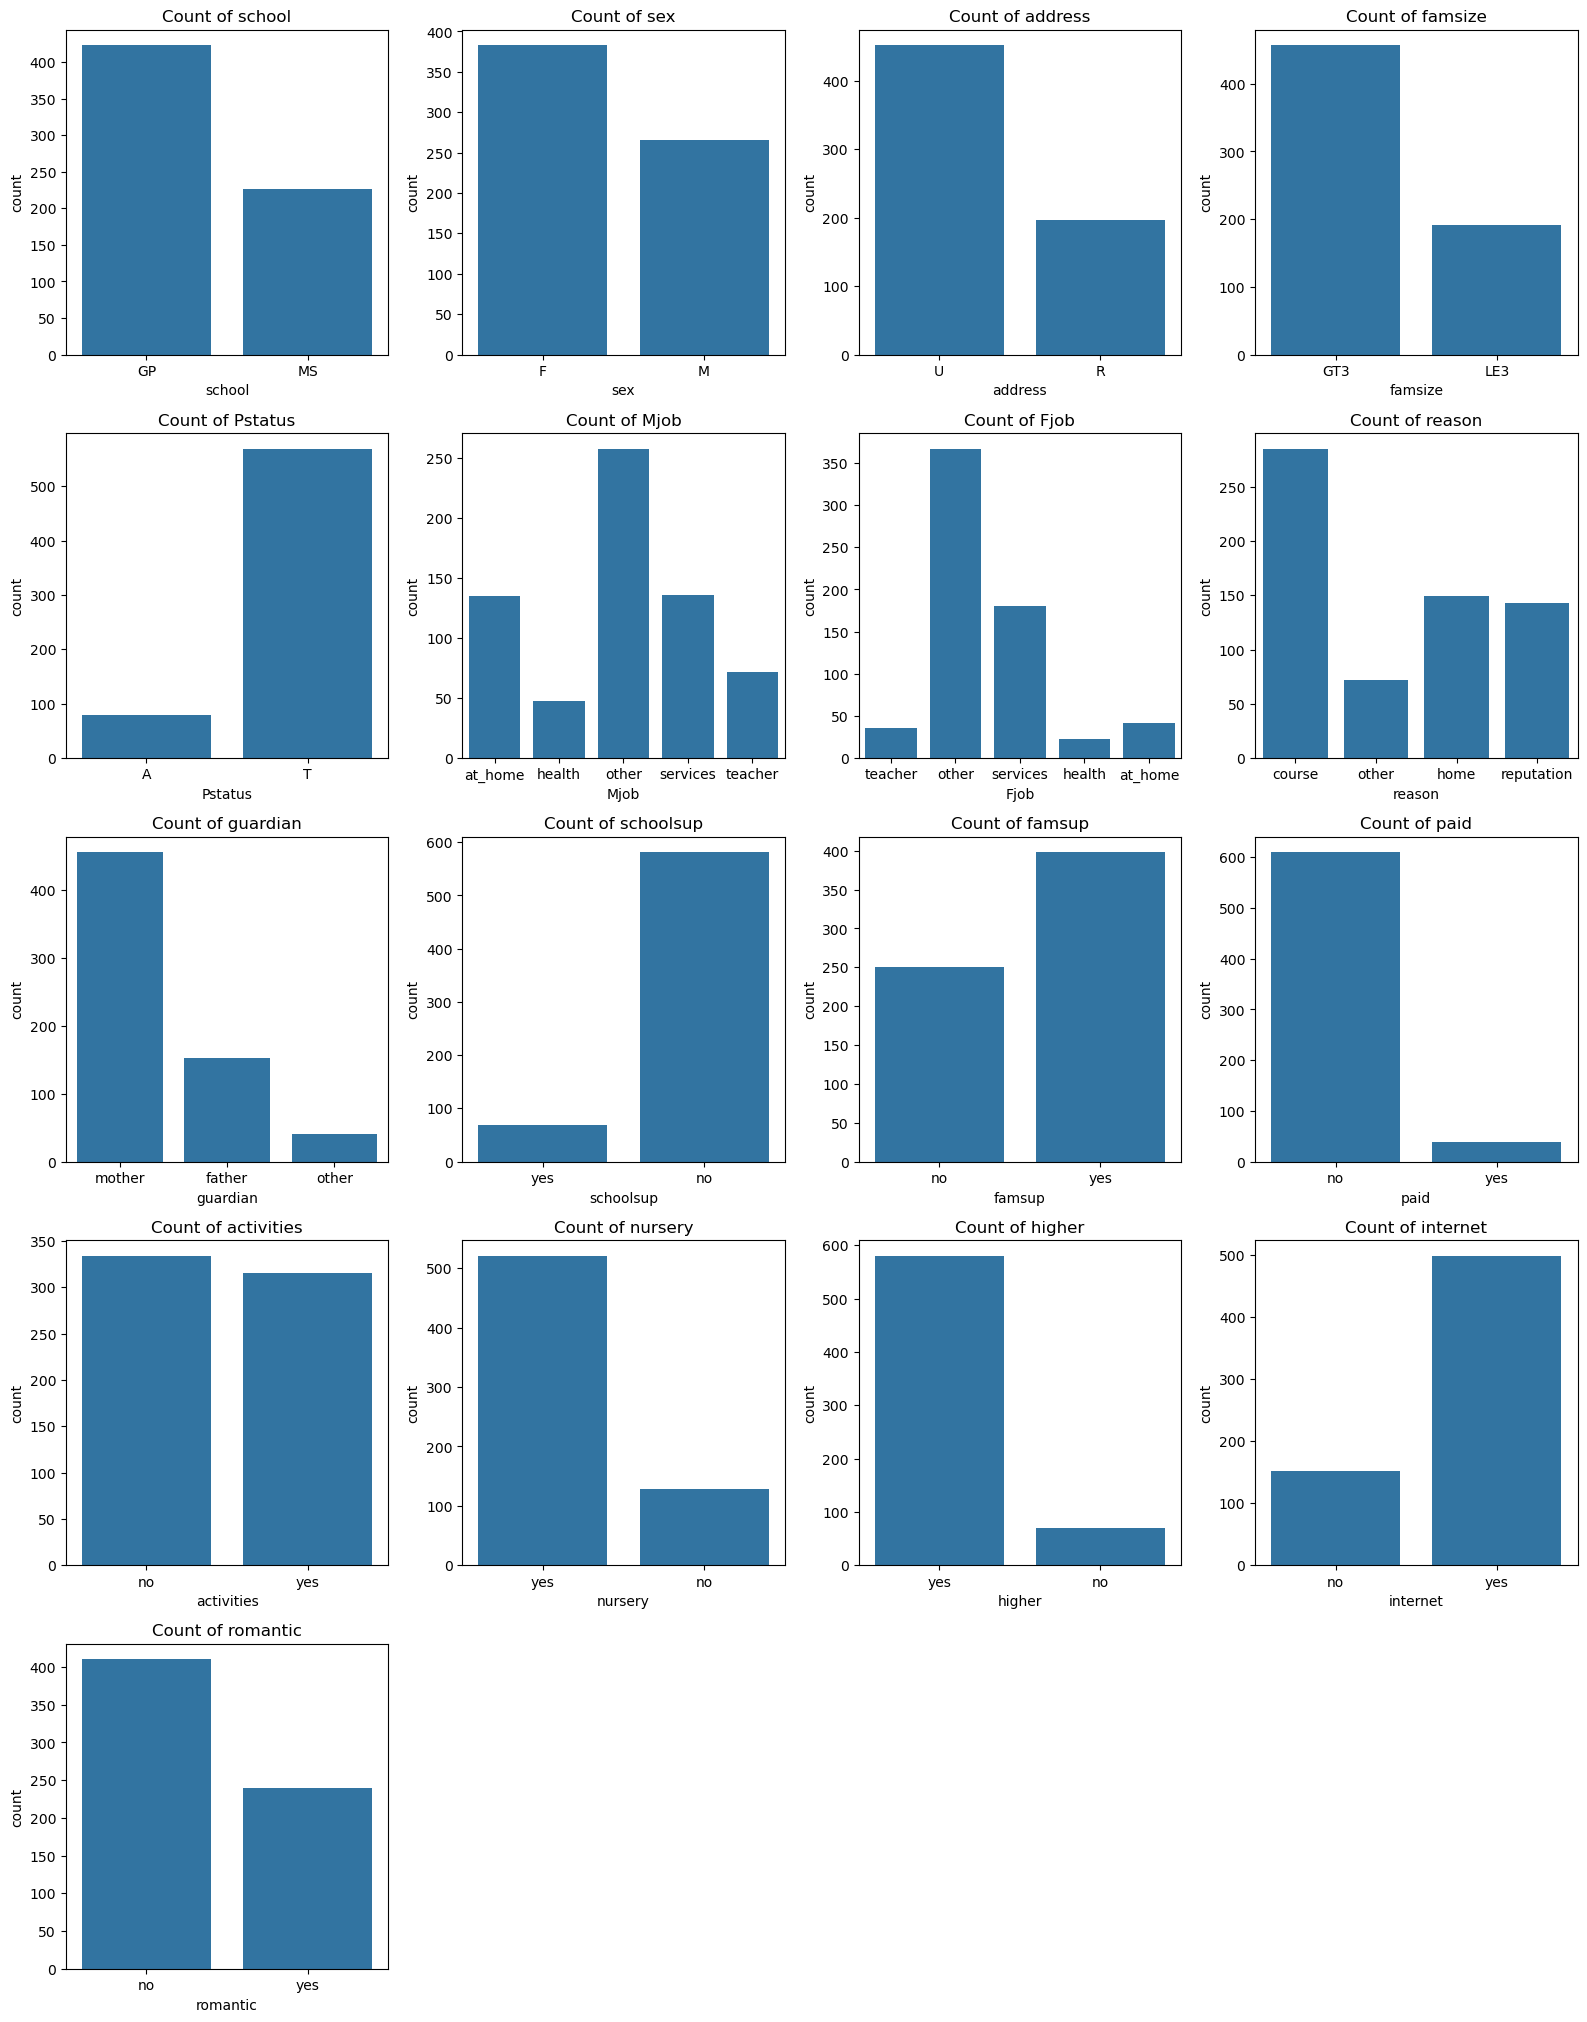

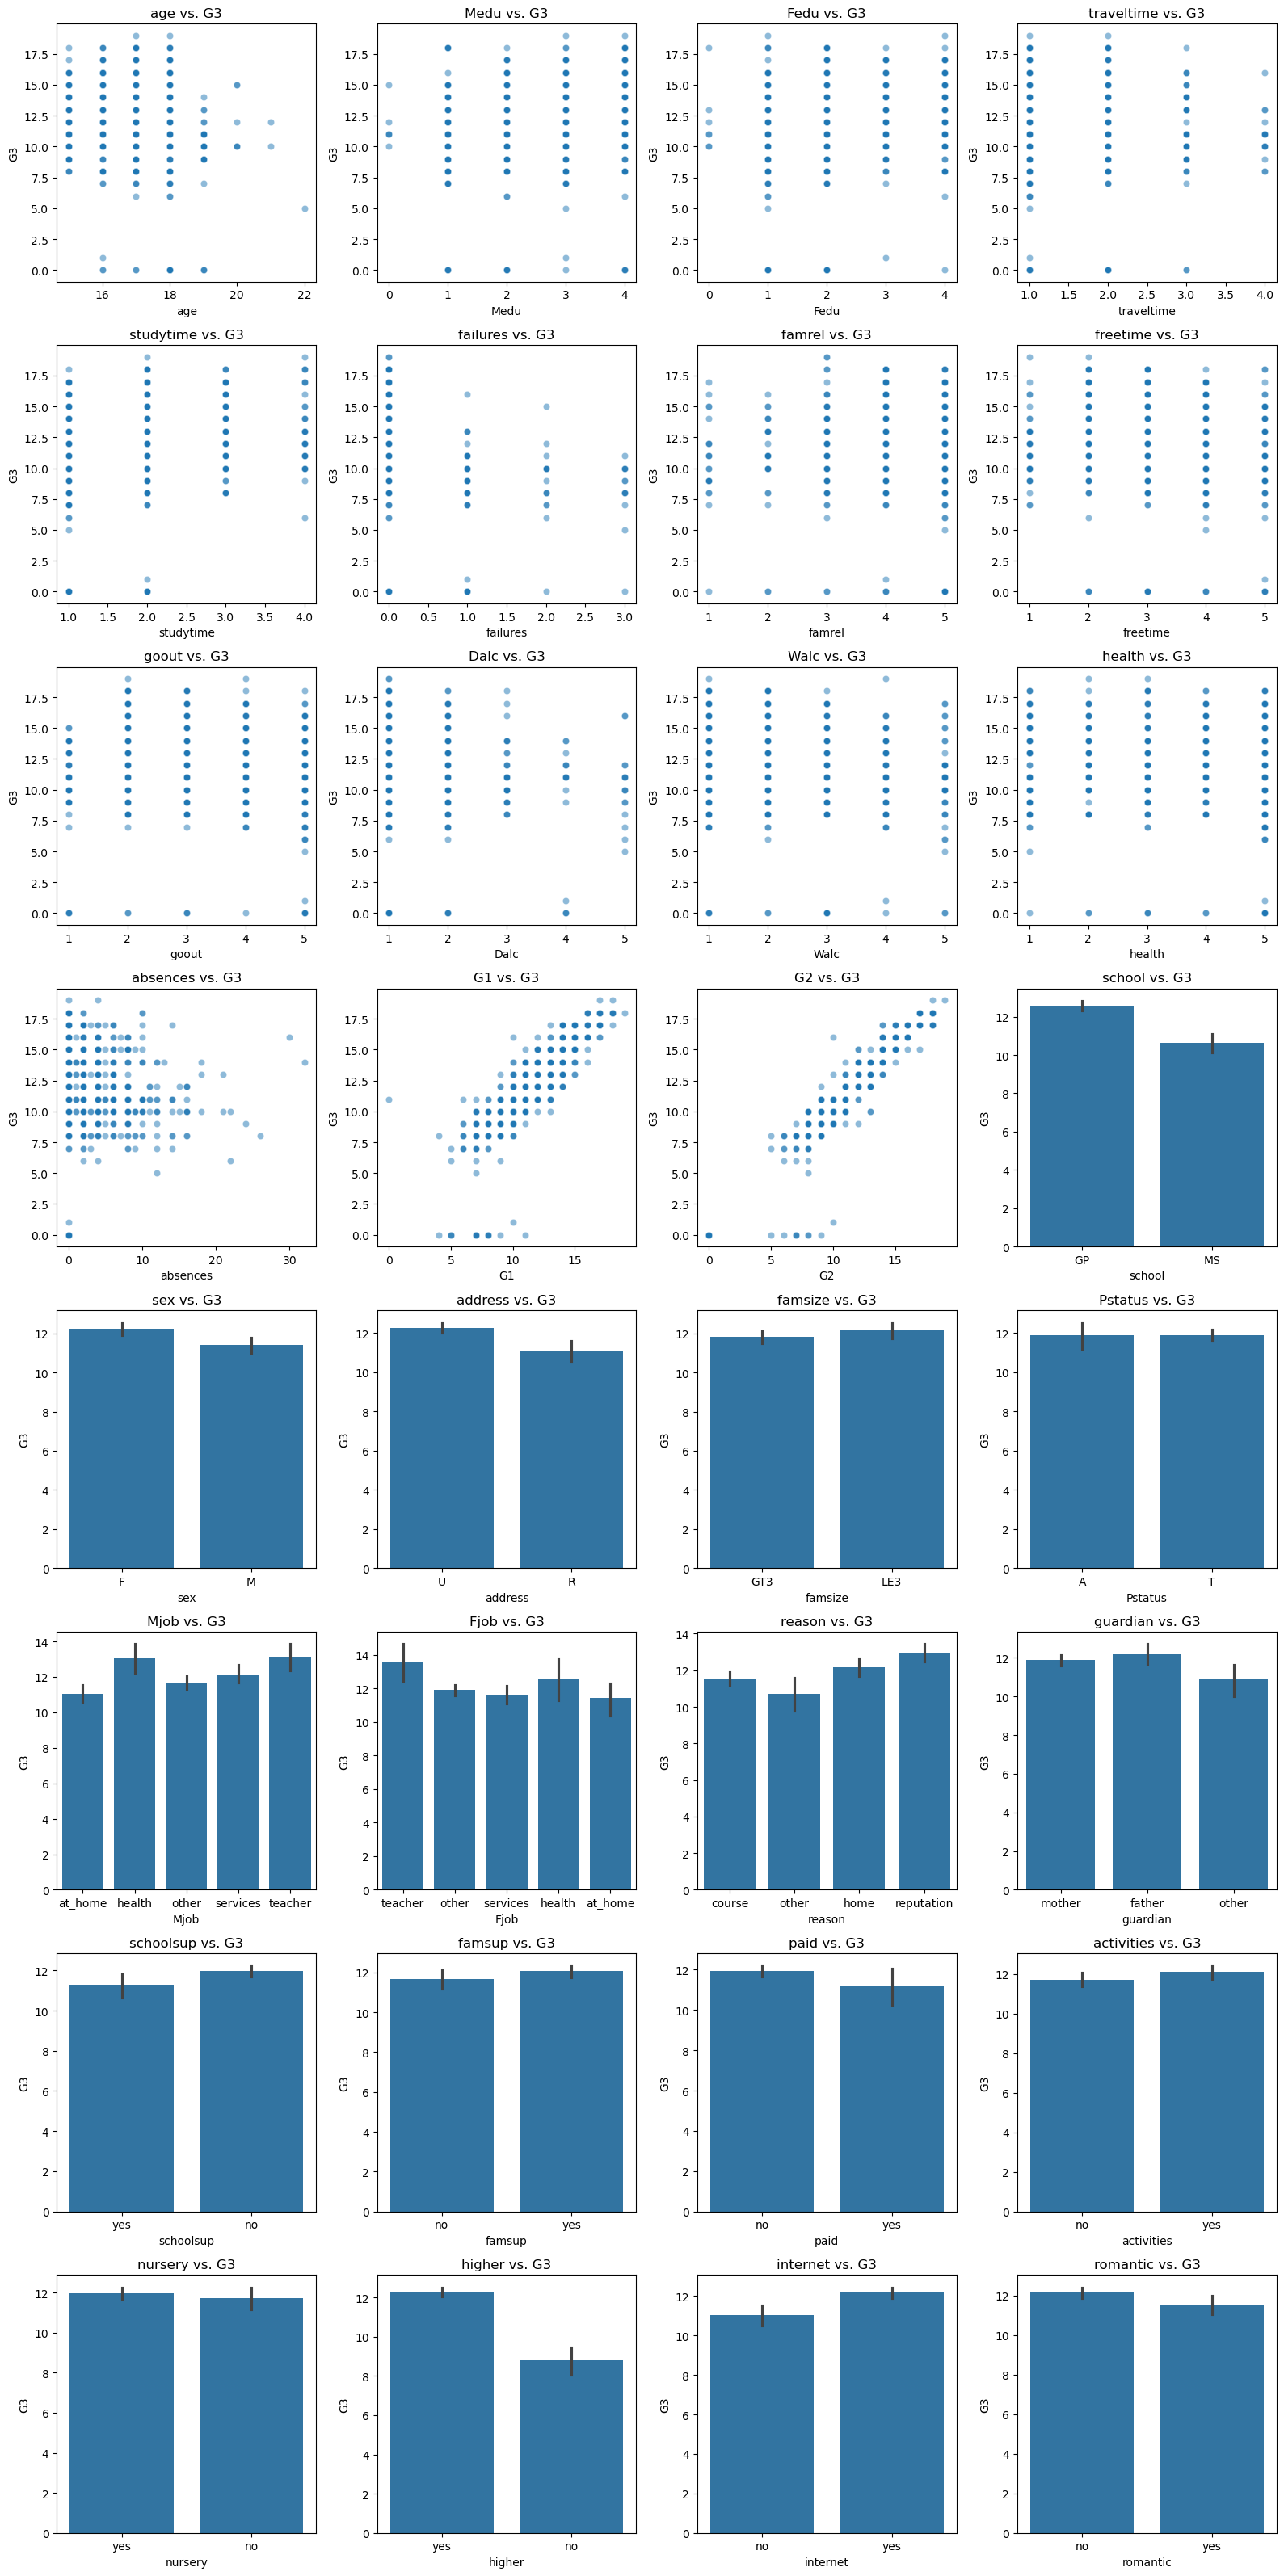

In [22]:
# lös uppgift 2 här
student_df.info()
# profile = ProfileReport(student_df, title="Pandas Profile Report", explorative=True, html= {'style':{'full_width': True}})
# profile.to_file("output.html") 
# profile.to_notebook_iframe()
print(student_df.isnull().sum())
display(student_df.describe())

#Divide data into numerical and categorical data (to plot)
numeric_columns = student_df.select_dtypes(include=["int64"]).columns.drop("G3") 
categorical_columns = student_df.select_dtypes(include=["object"]).columns

all_columns = list(numeric_columns) + list(categorical_columns)  
total_columns_len= len(all_columns)

ncols = 4  
nrows = math.ceil(total_columns_len / ncols)

#Plot Distribution of numeric columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.histplot(student_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])   #Delete empty plots
plt.tight_layout()
plt.show()

#Plot categorical columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()
for i, col in enumerate(categorical_columns):
    sns.countplot(x=student_df[col], ax=axes[i])
    axes[i].set_title(f"Count of {col}")
    axes[i].tick_params(axis="x")  

for i in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

#Plot all columns vs G3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()
for i, col in enumerate(numeric_columns):
    sns.scatterplot(x=student_df[col], y=student_df["G3"], ax=axes[i], alpha=0.5)
    axes[i].set_title(f"{col} vs. G3")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("G3")

for j, col in enumerate(categorical_columns, start=len(numeric_columns)):
    sns.barplot(x=student_df[col], y=student_df["G3"], ax=axes[j])
    axes[j].set_title(f"{col} vs. G3")
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("G3")

plt.tight_layout()
plt.show()



**Uppgift 3**

Gör en första hypotes på vilka features du tror är relevanta. 

Tvätta sedan datan och utför även den feature engineering du anser är lämplig. 

Kom ihåg att du även behöver hantera kategoriska kolumner. 

Motivera samtliga beslut och åtgärder med kommentarer.

In [23]:
# lös uppgift 3 här
#dividing absences in three groups (came to the bounderies due to the plot) so I could reduce number of columns
student_df["low_absence"] = (student_df["absences"] <= 10).astype(int)
student_df["mid_absence"] = ((student_df["absences"] > 10) & (student_df["absences"] <= 20)).astype(int)
student_df["high_absence"] = (student_df["absences"] > 20).astype(int)

student1_df = student_df.drop(columns=["Pstatus", "absences", "G1", "G2"])  #Seems to according to the plot that Pstatus doesn't have any korrelation with G3. Not using G1 and G2 cause it's like I'm giving the modell the answers while training due to that G3 has G1 and G2 included (leakage problem)

#Divide data into categorical- and nominal-columns so I can use onehotencoding to get better interpretability 
categorical_columns = student1_df.select_dtypes(include=['object']).columns
nominal_columns = ["Medu", "Fedu", "studytime", "traveltime", "famrel", 
                   "freetime", "goout", "Dalc", "Walc", "health", "failures", "low_absence", "mid_absence", "high_absence"]

student1_df = pd.get_dummies(student1_df, columns=categorical_columns , dtype=int, drop_first=True)
student1_df = pd.get_dummies(student1_df, columns=nominal_columns , dtype=int, drop_first=True)

student1_df

,age,G3,school_MS,sex_M,address_U,famsize_LE3,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,...,health_2,health_3,health_4,health_5,failures_1,failures_2,failures_3,low_absence_1,mid_absence_1,high_absence_1
0,18,11,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,17,11,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,15,12,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,15,14,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,16,13,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,10,1,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
645,18,16,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
646,18,9,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
647,17,10,1,1,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


**Uppgift 4**

Särkilj nu på features och target. Vår target är kolumnen G3.

Lägg alla features i variabeln X och din target i variabel y.

Obs! Du får inte använda kolumnerna G1 eller G2 som features, det är nästintill fuskig (varför?). Säkerställ att de **inte** är med i dina features.

Spara även namnen på kolumnerna du använder som features i en variabel som du kallar feature_column_names

In [24]:
# lös uppgift 4 här
X, y = student1_df.drop(columns=["G3"]), student1_df["G3"]
feature_column_names = X.columns.tolist()


**Uppgift 5**

Utför en helt vanlig train/test split. Sätt test size till 20%. Träna sedan en RandomForestRegressor på din träningsdata.

Använd random_state = 42 i både train/test split samt som argument till din modell.

In [25]:
# lös uppgift 5 här
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Kör nu koden nedan för att hur relativt viktig varje kolumn var för vår träning! Ett högre värde = viktigare kolumn.

Hur tolkar du det du ser? Does it make sense?

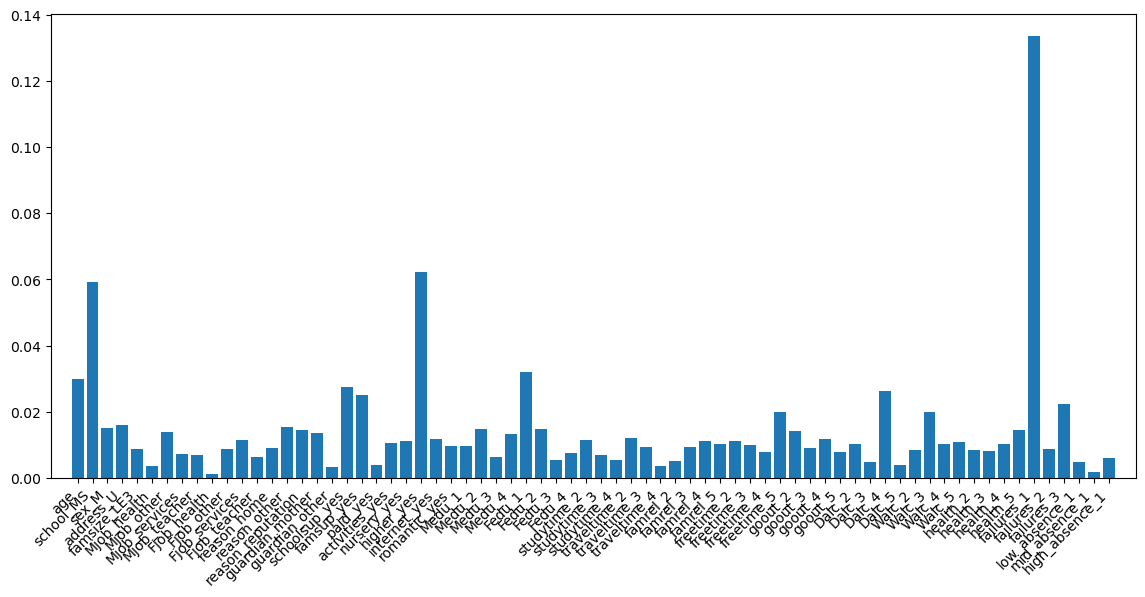

In [26]:
# had to adjust the code so I can see all text
#Some columns make sense but not others, I think that there is som outliers that are messing up my features
plt.subplots(figsize=(14, 8))
plt.bar(feature_column_names, model.feature_importances_);
plt.xticks(rotation=45, ha= "right", fontsize= 10);
plt.gca().margins(x=0.02)
plt.subplots_adjust(bottom=0.3)
plt.show()

**Uppgift 6**

Bra. Nu drar vi igång på riktigt.

Kör nu koden nedan för att utföra en GridSearch (med cross-validation) över alla kombinationer av de angivna hyperparameters.

Observera att vi använder hela datasetet X och y här, inte dina splits ovan. GridSearchCV skapar automatiskt splits åt oss.

Dokumentationen för GridSearchCV hittar du [här](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [27]:
# Skapa en parametergrid att söka bland

param_grid = {
    'max_depth': [2, 4, 6],
    'n_estimators': [2, 4, 6, 8, 10]
}

# Initiera en basmodell
rf = RandomForestRegressor()

# Defiiniera metric att räkna performance
score = make_scorer(mean_absolute_error)

# Definiera GridSearch-objektet
grid_search = GridSearchCV(estimator = rf,                # ange basmodell
                           param_grid = param_grid, 
                           cv = 3,                        # 3-fold cross-validation
                           n_jobs = -1,                   # använd alla möjliga processer för snabbare träning
                           verbose = 2,                   # läs i dokumentationen vad detta innebär
                           scoring=score) 

# Utför grid search över alla möjliga kombinationer av dina hyperparameters
grid_search.fit(X, y)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] END ........................max_depth=2, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=4; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=4; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=8; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=8; total time=   0.0s
[CV] END ........................max_depth=2, n_estimators=6; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END ........................max_depth=2, n_

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6],
                         'n_estimators': [2, 4, 6, 8, 10]},
             scoring=make_scorer(mean_absolute_error, response_method='predict'),
             verbose=2)

**Uppgift 7**

Kör koden nedan för att utforska vilken information som nu sparats från din GridSearch

In [28]:
cv_results = grid_search.cv_results_

cv_results.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

**Uppgift 8**

Vilken kombination av hyperparameters gav upphov till bäst/sämst performance?

Vilken är den bästa/sämsta scoren?

In [29]:
# lös uppgift 8 här

best_index = np.argmin(cv_results["mean_test_score"])  
worst_index = np.argmax(cv_results["mean_test_score"]) 

best_params = cv_results["params"][best_index]
worst_params = cv_results["params"][worst_index]

best_score = cv_results["mean_test_score"][best_index]
worst_score = cv_results["mean_test_score"][worst_index]

print(f"Best hyperparameters: {best_params} with score: {best_score:.4f}")
print(f"Worst hyperparameters: {worst_params} with score: {worst_score:.4f}")



Best hyperparameters: {'max_depth': 6, 'n_estimators': 6} with score: 2.3059
Worst hyperparameters: {'max_depth': 6, 'n_estimators': 2} with score: 2.4977


**Uppgift 9**

Är den bästa scoren "bra" i vårt sammanhang? Varför? Motivera.

*tips:* utför en ordentlig error analysis.

In [30]:
# lös uppgift 9 här
X_test = X_test.drop(columns=["age_group"], errors="ignore")

y_pred = model.predict(X_test)

results = pd.DataFrame({
    "school": X_test["school_MS"], 
    "y_true": y_test,
    "y_pred": y_pred
})

for value in results["school"].unique():
    subset = results[results["school"] == value]
    mse = mean_squared_error(subset["y_true"], subset["y_pred"])
    mae = mean_absolute_error(subset["y_true"], subset["y_pred"])
    r2 = r2_score(subset["y_true"], subset["y_pred"])
    
    print(f"School = {value}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R2: {r2:.2f}")
    print()

age_bins = [15, 16, 17, 18, 19, 20, 22]  
age_labels = ["15", "16", "17", "18", "19", "20+"]  
X_test["age_group"] = pd.cut(X_test["age"], bins=age_bins, labels=age_labels, right=False)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_pred = pd.Series(y_pred).reset_index(drop=True)

for age_group in age_labels:
    subset_indices = X_test[X_test["age_group"] == age_group].index
    
    if len(subset_indices) > 0:  
        y_true_subset = y_test.loc[subset_indices]
        y_pred_subset = y_pred.loc[subset_indices] 
        
        mse = mean_squared_error(y_true_subset, y_pred_subset)
        mae = mean_absolute_error(y_true_subset, y_pred_subset)
        r2 = r2_score(y_true_subset, y_pred_subset)
        
        print(f"Performance for Age Group {age_group}:")
        print(f"  MSE: {mse:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  R²: {r2:.4f}\n")
    else:
        print(f"No data for Age Group {age_group}\n")
    # The model's overall accuracy are low, indicating room for improvement. And for students 20+ seems to lack in my testset, which lead to to the conclusion that there is to little data on that group. I would say I have a bad performing modell with imbalanced features and some groups are under presented here. Maybe more feature engineering is


School = 1:
  MSE: 15.37
  MAE: 2.99
  R2: -0.09

School = 0:
  MSE: 4.95
  MAE: 1.67
  R2: 0.34

Performance for Age Group 15:
  MSE: 2.3866
  MAE: 1.2148
  R²: 0.2083

Performance for Age Group 16:
  MSE: 7.0117
  MAE: 2.0931
  R²: 0.0228

Performance for Age Group 17:
  MSE: 6.6233
  MAE: 1.9937
  R²: 0.1447

Performance for Age Group 18:
  MSE: 22.4199
  MAE: 3.4287
  R²: 0.1955

Performance for Age Group 19:
  MSE: 5.3574
  MAE: 2.0329
  R²: -4.4690

No data for Age Group 20+



**Uppgift 10**

Testa nu att träna med dina egenvalda hyperparameters! 

Du kan lägga till fler värden för max_depth och n_estimators, men du kan också välja fler hyperparameters att tune:a.

Random Forest har många fler hyperparameters, kolla in den officiella dokumentationen [här](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

Lägg till minst 4 fler hyperparameters, utöver max_depth och n_estimators, och välj vilka värden på dessa du vill testa. 

Kör igenom en till GridSearch över dessa. Får du bättre resultat än innan?

**Tips**: För din egen skull, försök även första vad de olika hyperparameters du väljer faktiskt kontrollerar.

In [37]:
# lös uppgift 10 här


param_grid = {
    "max_depth": [4, 6, 8, 10],
    "criterion":["absolute_error", "squared_error"],
    "n_estimators": [2, 4, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf":[1, 2, 5],
    "max_features": ["sqrt", "log2", None],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
    "max_leaf_nodes": [None, 10, 20]
}
score = make_scorer(mean_absolute_error)
model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = model,                
                           param_grid = param_grid, 
                           cv = 3, 
                           scoring=score,                       
                           n_jobs = -1,                   
                           verbose = 1
                           ) 

grid_search.fit(X, y)

cv_results = grid_search.cv_results_

best_index = np.argmin(cv_results["mean_test_score"])  
worst_index = np.argmax(cv_results["mean_test_score"]) 

best_params = cv_results["params"][best_index]
worst_params = cv_results["params"][worst_index]

best_score = cv_results["mean_test_score"][best_index]
worst_score = cv_results["mean_test_score"][worst_index]

print(f"Best hyperparameters: {best_params} with score: {best_score:.4f}")
print(f"Worst hyperparameters: {worst_params} with score: {worst_score:.4f}")


Fitting 3 folds for each of 7776 candidates, totalling 23328 fits
Best hyperparameters: {'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10} with score: 2.3272
Worst hyperparameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2} with score: 2.9201


**Uppgift 11**

Kör nu även en GridSearch på en enstaka Decision Tree (inte Random Forest) där du testar olika värden på max_depth.

Hur förhåller sig resultatet här mot det vi fick med Random Forest?

Kolla gärna dokumentationen för Decision Tree [här](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), och se om du kan leka med fler hyperparameters än enbart max_depth.

In [32]:
# lös uppgift 11 här
#Seems like the decision tree performed better du e to that the score is higher here... If I didn't missunderstand that it's inverted MAE due to not having "greater_is_better=False" as a parameter to make_scorer

param_grid = {
    "max_depth": [2, 6, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": [None, "sqrt", "log2"],
    "criterion": ["squared_error", "absolute_error"],
    "splitter": ["best", "random"]
}

dt_model = DecisionTreeRegressor(random_state=42)

score = make_scorer(mean_absolute_error)

grid_search_dt = GridSearchCV(estimator=dt_model,
                              param_grid=param_grid,
                              cv=3,               
                              scoring=score,
                              n_jobs=-1,          
                              verbose=1)

grid_search_dt.fit(X, y)

cv_results = grid_search_dt.cv_results_
best_index = np.argmax(cv_results["mean_test_score"])
worst_index = np.argmin(cv_results["mean_test_score"])

best_params = grid_search_dt.best_params_
worst_params = cv_results["params"][worst_index]

best_score = grid_search_dt.best_score_
worst_score = cv_results["mean_test_score"][worst_index]

print(f"Best hyperparameters: {best_params} with score: {best_score:.4f}")
print(f"Worst hyperparameters: {worst_params} with score: {worst_score:.4f}")


Fitting 3 folds for each of 648 candidates, totalling 1944 fits
Best hyperparameters: {'criterion': 'squared_error', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'} with score: 3.4555
Worst hyperparameters: {'criterion': 'absolute_error', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'} with score: 2.2886


**Uppgift 12**


Vi har nu haft ett fixerat dataset och testa massa olika hyperparameters på framförallt Random Forest. 

Men, nu ska vi även börja fiffla med att testa olika features också! 

Kom ihåg - för varje kombination av features får vi GridSearcha om och hitta de hyperparameters som presterar bäst.

Testa nu annorlunda input features och kör en GridSearch över hyperparametrar för Random Forest, och försök hitta den kombination av hyperparameters för Random Forest som presterar bäst på dessa. 

In [33]:
# lös uppgift 12 här

feature_sets = {
    "set_few_1": ["age", "failures_1", "higher_yes"],
    "set_few_2": ["studytime_3", "internet_yes", "freetime_3"],
    "set_few_3": ["age", "failures_1", "Dalc_3", "famrel_3"],
    "set_medium_1": ["age", "failures_1", "studytime_3", "higher_yes", "internet_yes"],
    "set_medium_2": ["age", "school_MS", "failures_1", "freetime_3", "Dalc_3", "famrel_3"],
    "set_medium_3": ["age", "failures_1", "studytime_3", "higher_yes", "internet_yes", "freetime_3", "goout_3"],
    "set_many_1": ["age", "failures_1", "studytime_3", "higher_yes", "internet_yes", "freetime_3", "Dalc_3", "famrel_3"],
    "set_many_2": ["age", "school_MS", "failures_1", "studytime_3", "higher_yes", "internet_yes", "freetime_3", "Dalc_3", "goout_3"],
    "set_many_3": ["age", "failures_1", "studytime_3", "higher_yes", "internet_yes", "freetime_3", "Dalc_3", "famrel_3", "goout_3", "health_3"]
}

param_grid = {
    "max_depth": [2, 4, 6, 8],
    "n_estimators": [2, 4, 5, 10, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf":[1, 2, 5],
    "max_features": ["sqrt", "log2", None],
    "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
    "max_leaf_nodes": [None, 10, 20, 50]
}

target = student1_df["G3"]

mae_scorer = make_scorer(mean_absolute_error) #I kept it as before with higher MAE to compare easier

results = {}

for set_name, features in feature_sets.items():
    print(f"\nTesting feature set: {set_name}")
    
    X = student1_df[features]
    
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        cv=3,
        scoring=mae_scorer, 
        n_jobs=-1
    )


    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_ 
    test_mae = mean_absolute_error(y_test, grid_search.predict(X_test))

    results[set_name] = {
        "best_params": best_params,
        "cv_mae": best_score,  
        "test_mae": test_mae,
        "feature_count": len(features)
    }
    
    print(f"Best parameters: {best_params}")
    print(f"CV MAE: {best_score:.4f}")
    print(f"Test MAE: {test_mae:.4f}")
    print(f"Number of features: {len(features)}")

best_set = max(results.items(), key=lambda x: x[1]["test_mae"])[0]


print("\n===== FINAL RESULTS =====")
print(f"Best feature set: {best_set}")
print(f"Number of features: {results[best_set]['feature_count']}")
print(f"Best hyperparameters: {results[best_set]['best_params']}")
print(f"Cross-validation MAE: {results[best_set]['cv_mae']:.4f}")
print(f"Test set MAE: {results[best_set]['test_mae']:.4f}")

print("\n===== TOP 3 FEATURE SETS =====")
top_sets = sorted(results.items(), key=lambda x: x[1]["test_mae"], reverse=True)[:3]

for i, (set_name, info) in enumerate(top_sets, 1):
    print(f"{i}. {set_name}")
    print(f"   Feature count: {info['feature_count']}")
    print(f"   Best hyperparameters: {info['best_params']}")
    print(f"   Test MAE: {info['test_mae']:.4f}")
    print()


Testing feature set: set_few_1
Best parameters: {'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.2, 'n_estimators': 2}
CV MAE: 2.4323
Test MAE: 2.4096
Number of features: 3

Testing feature set: set_few_2
Best parameters: {'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2}
CV MAE: 2.4308
Test MAE: 2.3250
Number of features: 3

Testing feature set: set_few_3
Best parameters: {'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2}
CV MAE: 2.5036
Test MAE: 2.3872
Number of features: 4

Testing feature set: set_medium_1
Best parameters: {'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.2, 'n_estimat

KeyboardInterrupt: 

**Uppgift 13**

Kan du hitta en minsta mängd features som räcker för att få hög prestanda? Dvs, hur många & vilka features kan du drop:a utan någon vidare prestandaförlust?

In [ ]:
# lös uppgift 13 här

# My conclusion is these features ['failures_1', 'studytime_3', 'higher_yes'] with not to much lost, I've experminted with removal of on feature at a time for all features first and then arrived to the conclusion that these where the most important features
priority_features = [
    "failures_1",      
    "studytime_3",      
    "higher_yes",       
    "age",              
    "freetime_3",       
    "Dalc_3",           
    "famrel_3",         
    "internet_yes",     
]


target = student1_df["G3"]


results = {}
for num_features in range(1, len(priority_features) + 1):

    features = priority_features[:num_features]
    set_name = f"top_{num_features}_features"
    
    X = student1_df[features]
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(random_state=42, max_depth=8, max_features="sqrt", n_estimators=2)  
    model.fit(X_train, y_train)

    test_mae = mean_absolute_error(y_test, model.predict(X_test))
    results[set_name] = {
        "features": features,
        "test_mae": test_mae,
        "num_features": num_features
    }
    
    print(f"\nTesting feature set: {set_name}")
    print(f"Features: {features}")
    print(f"Test MAE: {test_mae:.4f}")

best_set = min(results.items(), key=lambda x: x[1]["test_mae"])
print("\n===== BEST FEATURE SET =====")
print(f"Set: {best_set[0]}")
print(f"Features: {best_set[1]['features']}")
print(f"Test MAE: {best_set[1]['test_mae']:.4f}")
print(f"Number of features: {best_set[1]['num_features']}")


Testing feature set: top_1_features
Features: ['failures_1']
Test MAE: 2.3395

Testing feature set: top_2_features
Features: ['failures_1', 'studytime_3']
Test MAE: 2.2924

Testing feature set: top_3_features
Features: ['failures_1', 'studytime_3', 'higher_yes']
Test MAE: 2.2149

Testing feature set: top_4_features
Features: ['failures_1', 'studytime_3', 'higher_yes', 'age']
Test MAE: 2.2202

Testing feature set: top_5_features
Features: ['failures_1', 'studytime_3', 'higher_yes', 'age', 'freetime_3']
Test MAE: 2.3416

Testing feature set: top_6_features
Features: ['failures_1', 'studytime_3', 'higher_yes', 'age', 'freetime_3', 'Dalc_3']
Test MAE: 2.3429

Testing feature set: top_7_features
Features: ['failures_1', 'studytime_3', 'higher_yes', 'age', 'freetime_3', 'Dalc_3', 'famrel_3']
Test MAE: 2.3485

Testing feature set: top_8_features
Features: ['failures_1', 'studytime_3', 'higher_yes', 'age', 'freetime_3', 'Dalc_3', 'famrel_3', 'internet_yes']
Test MAE: 2.4155

===== BEST FEATUR